In [30]:
# Import libraries

# Data processing, analysis and visualisation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# To convert string to list
from ast import literal_eval

# Resampling data
from sklearn.utils import resample

# Pandas profiling
import pandas_profiling
from pandas_profiling import ProfileReport

# Word cloud visualisation
from wordcloud import WordCloud

# Data pre-processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [31]:
# Load the dataset into a pandas dataframe
file_path = "../data/gold_standard.csv"
df = pd.read_csv(file_path)

In [32]:
# Preview first 5 rows of dataset. Extend the max column width in order to preview the entire sentence column
pd.set_option('display.max_colwidth', None)
df.head()

,sentence,tag,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Except as agreed upon by mutual consent, the Joint Venturers shall not be required to make any capital contribution to the Joint Venture.",['prohibition'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Joint Venturers shall have full and complete charge of all affairs of the Joint Venture.,['permission'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Neither Joint Venturer shall be entitled to compensation for services rendered to the Joint Venture as such, but each Joint Venturer shall be reimbursed for all direct expenses, including travel, office, and all other out-of-pocket expenses incurred in the operation of the affairs of the Joint Venture and the promotion of its businesses.","['prohibition', 'obligation']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"It is agreed that either Joint Venturer shall, except as provided for below, have authority to execute instruments of any character relating to the affairs of the Joint Venture; provided, that without the written consent or approval of both of the Joint Venturers: (i) the Joint Venture shall incur no liability of any sort, nor any indebtedness for borrowed funds; (ii) no assets owned in the name of the Joint Venture be disposed of; and (iii) no commitment to purchase any item for the Joint Venture shall be made.","['permission', 'prohibition']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Joint Venturers shall maintain adequate books and records to be kept of all the Joint Venture activities and affairs conducted pursuant to the terms of this Agreement.,['obligation'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Lots of empty/unnamed columns. Let's view the column names
df.columns

Index(['sentence', 'tag', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [34]:
# Now let's drop these unnamed columns (not sure why they've popped up) and view dataframe again
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'], inplace=True, axis=1)
    
df.head()

,sentence,tag
0,"Except as agreed upon by mutual consent, the Joint Venturers shall not be required to make any capital contribution to the Joint Venture.",['prohibition']
1,The Joint Venturers shall have full and complete charge of all affairs of the Joint Venture.,['permission']
2,"Neither Joint Venturer shall be entitled to compensation for services rendered to the Joint Venture as such, but each Joint Venturer shall be reimbursed for all direct expenses, including travel, office, and all other out-of-pocket expenses incurred in the operation of the affairs of the Joint Venture and the promotion of its businesses.","['prohibition', 'obligation']"
3,"It is agreed that either Joint Venturer shall, except as provided for below, have authority to execute instruments of any character relating to the affairs of the Joint Venture; provided, that without the written consent or approval of both of the Joint Venturers: (i) the Joint Venture shall incur no liability of any sort, nor any indebtedness for borrowed funds; (ii) no assets owned in the name of the Joint Venture be disposed of; and (iii) no commitment to purchase any item for the Joint Venture shall be made.","['permission', 'prohibition']"
4,The Joint Venturers shall maintain adequate books and records to be kept of all the Joint Venture activities and affairs conducted pursuant to the terms of this Agreement.,['obligation']


In [35]:
# With unnamed columns gone, I can now view the shape of the dataframe
row_count, column_count = df.shape
df.shape

(1664, 2)

In [36]:
# Check the data types
df.dtypes

sentence    object
tag         object
dtype: object

In [37]:
# Check for null values
df.isnull().sum()

sentence    0
tag         0
dtype: int64

In [38]:
# Also check if there are any duplicate records
df[df.duplicated(keep=False)]

,sentence,tag
1165,DeltaThree shall be responsible for all costs in connection therewith.,['obligation']
1167,DeltaThree shall be responsible for all costs in connection therewith.,['obligation']
1174,The parties shall negotiate in good faith to resolve any such disputes.,['obligation']
1186,The parties shall negotiate in good faith to resolve any such disputes.,['obligation']


In [39]:
# Remove duplicates and check new shape of dataframe (it should be 2 records less than before)
df.drop_duplicates(keep='first', inplace=True)
df.shape

(1662, 2)

In [40]:
#  Check once again for duplicates
df[df.duplicated(keep=False)]

,sentence,tag


In [41]:
# The target y is the 'tag' column. Let's explore by looking at the unique values in that column
df['tag'].unique()

array(["['prohibition']", "['permission']",
       "['prohibition', 'obligation']", "['permission', 'prohibition']",
       "['obligation']", "['obligation', 'prohibition']",
       "['prohibition', 'permission']", "['permission', 'obligation']",
       "['obligation', 'permission']",
       "['prohibition', 'obligation', 'permission']"], dtype=object)

In [42]:
# Some records have more than one tag - instead of displaying the 3 unique tags, a double or triple tag is being read as a separate tag
# This also means that checking the value counts and data imbalance will display more than 3 classes
# Will address this later but first, let's get an idea of how imbalanced the data is
df['tag'].value_counts()

['obligation']                                 966
['permission']                                 311
['prohibition']                                269
['obligation', 'prohibition']                   43
['prohibition', 'obligation']                   19
['permission', 'obligation']                    19
['obligation', 'permission']                    19
['prohibition', 'permission']                    9
['permission', 'prohibition']                    4
['prohibition', 'obligation', 'permission']      3
Name: tag, dtype: int64

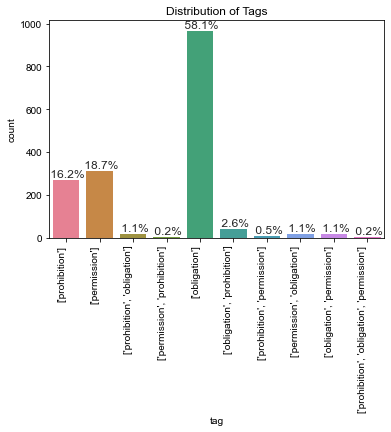

In [43]:
# If we were to visualise the data as is, we end up with a graph of 10 columns as seen below
ax = sns.countplot(x='tag', data=df, palette="husl")
sns.set_theme(style='whitegrid')
plt.xticks(size=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_xticklabels(ax.get_xticklabels())
plt.title("Distribution of Tags")

# Add % to bars in graph
total = len(df)
for p in ax.patches:
    percent = f'{100*p.get_height() / total: .1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percent, (x, y), ha='center', va='center')
#plt.tight_layout()
plt.show()

In [44]:
# Obligation is about 3x the size of the other classes. Downsampling obligation will create balance (the double and triple classes are small enough to ignore for now)
# Create 2 dataframes for each class - majority and minority
majority_df = df[df['tag'] == "['obligation']"]
minority_df = df[df['tag'] != "['obligation']"]

print(majority_df.shape)
print(minority_df.shape)

(966, 2)
(696, 2)


In [45]:
# Downsample the minority class by 715 records leaving 251 samples
obligation_downsample = resample(majority_df,
replace=False,
n_samples=251,
random_state=42)

print(obligation_downsample.shape)

(251, 2)


In [46]:
# To create final dataframe, concatenate minority_df with the resampled dataframe
df_new = pd.concat([obligation_downsample, minority_df])
print(df_new.shape)

(947, 2)


In [47]:
# View value counts for new dataframe
print(df_new['tag'].value_counts())

['permission']                                 311
['prohibition']                                269
['obligation']                                 251
['obligation', 'prohibition']                   43
['prohibition', 'obligation']                   19
['permission', 'obligation']                    19
['obligation', 'permission']                    19
['prohibition', 'permission']                    9
['permission', 'prohibition']                    4
['prohibition', 'obligation', 'permission']      3
Name: tag, dtype: int64


In [48]:
# There are still more than 3 classes being displayed
# Double and triple tags need to be separated to get a better visualisation of the data imbalance and to prepare the data for modelling

# Firstly, what type of data is recorded in the tag column?
type(df_new['tag'].iloc[0])

str

In [49]:
# The data is a string and needs to be converted to a list so that each element of the list can be read separately

# Convert to a list using AST's literal_eval method
df_new['tag'] = df_new['tag'].apply(lambda x: literal_eval(x))

# Display five records
df_new['tag'].values[:5]

array([list(['obligation']), list(['obligation']), list(['obligation']),
       list(['obligation']), list(['obligation'])], dtype=object)

In [50]:
# Check (using a random index) if data is still a string (it shouldn't be)
type(df_new['tag'].iloc[10])

list

In [51]:
# Create a new dataframe of tags only by iterating through the lists
df_plot = pd.DataFrame({'label': [y for x in df_new['tag'] for y in x]})
df_plot.head()

,label
0,obligation
1,obligation
2,obligation
3,obligation
4,obligation


In [52]:
# Check value counts of new dataframe
df_plot['label'].value_counts()

permission     365
obligation     354
prohibition    347
Name: label, dtype: int64

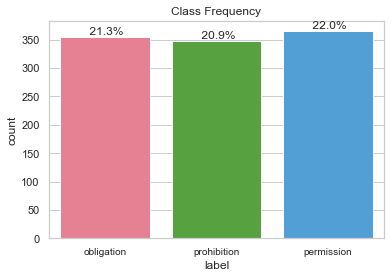

In [53]:
# Yay! Only 3 classes being displayed. Now, we can visualise the class distribution and confirm the resampling is sufficient
ax = sns.countplot(x='label', data=df_plot, palette="husl")
sns.set_theme(style='whitegrid')
plt.xticks(size=10)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title("Class Frequency")

# Add % to bars in graph
total = len(df)
for p in ax.patches:
    percent = f'{100*p.get_height() / total: .1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percent, (x, y), ha='center', va='center')
plt.show()

In [54]:
# Let's explore the data a bit more

# Word count of sentences
df_new['word_count'] = df_new['sentence'].str.findall(r'(\w+)').str.len()
df_new.head()

,sentence,tag,word_count
445,We will issue a certificate of completion for each Manager Trainee who completes the initial training program we require to our satisfaction (each such person will be referred to as a “Certified Manager”).,[obligation],33
784,"ELEPHANT TALK bears the risk of and shall indemnify T-Mobile against high usage, fraud and bed debts/non-payment of its ELEPHANT TALK Customers.",[obligation],25
1447,"Subject to the terms and conditions of this Agreement, Aimmune shall be responsible for the Development of the Product as set forth herein. Aimmune, itself or with or through its Affiliates and Sublicensees, shall use Commercially Reasonable Efforts to perform the Development Activities for the Product to (i) achieve the development milestones set forth in Section 7.2, and (ii) obtain Regulatory Approval for the Product.",[obligation],66
945,eDiets shall ensure that the eDiets Content complies with Women.com's editorial guidelines.,[obligation],14
132,"Auriemma will participate in one (1) recording session annually during the Services Period of not more than two (2) hours, not including travel time, to record a radio advertising spot at a date and location to be mutually agreed upon;",[obligation],40


In [55]:
# Check summary statistics for word count
df_new.agg({
    'word_count': ['min', 'max','mean', 'median', 'skew']
})

,word_count
min,7.000000
max,691.000000
mean,52.527983
median,39.000000
skew,5.240573


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


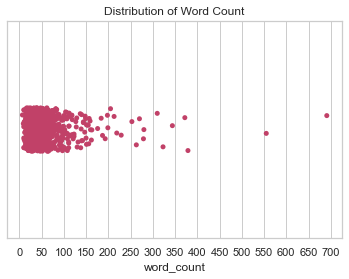

In [56]:
# Visualise spread of word count
fig, ax = plt.subplots()
plt.title("Distribution of Word Count")
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])
sns.stripplot(df_new['word_count'], ax=ax, palette="flare")
plt.show()

In [58]:
# View longest sentence
df_new.sort_values(by=['word_count'], ascending=False)

,sentence,tag,word_count
364,"Without affecting any other rights that it may be entitled to, either party may give notice in writing to the other terminating this agreement immediately if: (a) the other party fails to pay any amount due under this agreement on the due date for payment and remains in default not less than 14 days after being notified in writing to make such payment; or (b) the other party commits a material breach of any material term of this agreement and (if such breach is remediable) fails to remedy that breach within a period of 14 days of being notified in writing to do so; or (c) the other party repeatedly breaches any of the terms of this agreement in such a manner as to reasonably justify the opinion that its conduct is inconsistent with it having the intention or ability to give effect to the terms of this agreement; or (d) the other party suspends, or threatens to suspend, payment of its debts or is unable to pay its debts as they fall due or admits inability to pay its debts or (being a company) is deemed unable to pay its debts within the meaning of the Corporations Act 2001 (Cth) OR (being a natural person) is deemed either unable to pay its debts or as having no reasonable prospect of so doing, in either case, within the meaning of the Corporations Act 2001 (Cth) OR (being a partnership) has any partner to whom any of the foregoing apply: or (e) the other party commences negotiations with all or any class of its creditors with a view to rescheduling any of its debts, or makes a proposal for or enters into any compromise or arrangement with its creditors other than for the sole purpose of a scheme for a solvent amalgamation of that other party with one or more other companies or the solvent reconstruction of that other party; or (f) a petition is filed, a notice is given, a resolution is passed, or an order is made, for or in connection with the winding up of that other party other than for the sole purpose of a scheme for a solvent amalgamation of that other party with one or more other companies or the solvent reconstruction of that other party: or (g) an application is made to court, or an order is made, for the appointment of an administrator or if a notice of intention to appoint an administrator is given or if an administrator is appointed over the other party; or (h) a person becomes entitled to appoint a receiver over the assets of the other party or a receiver is appointed over the assets of the other party; or (i) the other party, being an individual, is the subject of a bankruptcy petition or order; or (j) a creditor or encumbrancer of the other party attaches or takes possession of, or a distress, execution, sequestration or other such process is levied or enforced on or sued against, the whole or any part of its assets and such attachment or process is not discharged within 14 days; or (k) any event occurs, or proceeding is taken, with respect to the other party in any jurisdiction to which it is subject that has an effect equivalent or similar to any of the events mentioned in clause 11.2(d) to clause 11.2(j) (inclusive); or (l) the other party suspends or ceases, or threatens to suspend or cease, to carry on all or a substantial part of its business; or (m) the other party, being an individual, dies or, by reason of illness or incapacity (whether mental or physical), is incapable of managing his or her own affairs or becomes a patient under any mental health legislation. (n) Without affecting any other rights that it may be entitled to, the Supplier may give notice in writing to the Distributor terminating this agreement immediately if the Distributor purports to assign its rights or obligations under this agreement to an entity that is not (1) affiliated with, (2) related to, or (3) sharing common ownership with the Distributor (a Permitted Assignee).",[permission],691
643,"We may terminate this Agreement by written notice to you, without giving you an opportunity to cure, upon the 

In [37]:
# Pandas profiling provides EDA on the dataframe
profile = ProfileReport(df_new, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

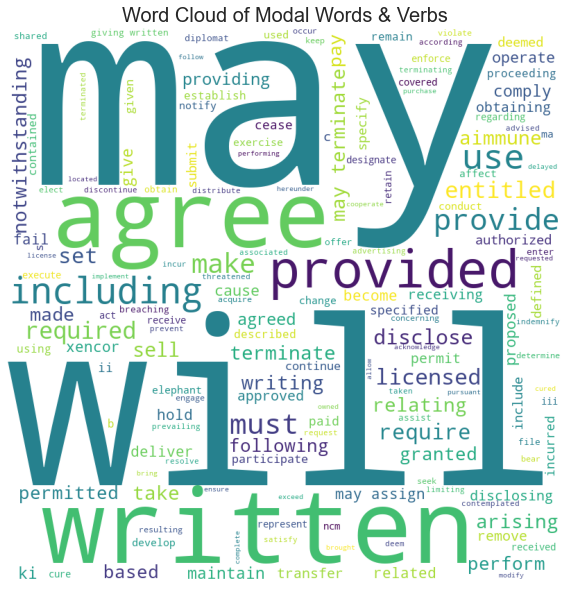

In [38]:
# Words are the crux of the dataset. Let's visualise the popular words using wordcloud

# Retrieve important words from the dataset
comment_words = ' '

for val in df_new.sentence:
        bag = [ ]
        tokens = word_tokenize(val)
        tokens = [token.lower() for token in tokens if token.isalpha()]
        pos_tags = nltk.pos_tag(tokens)

        # Include modal verbs and other verb types
        select_pos = ['MD', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
        for word, tag in pos_tags:
            if tag in select_pos:
                bag.append((word))

        for i in range(len(bag)):
            bag[i] = bag[i].lower()
        comment_words += " ".join(bag)+" "

# Create word cloud
word_cloud = WordCloud(
                    width = 800, height = 800,
                    background_color='white',
                    min_font_size = 10
                    ).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud of Modal Words & Verbs", fontsize=20)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)


In [39]:
# Pre-process text
# Display nltk stopwords
stop_words = set(stopwords.words('english'))
print(f"Total stopwords: {len(stop_words)}")
print(stop_words)

Total stopwords: 179
{"doesn't", 'so', 'or', 'should', 'm', 'been', "mustn't", 'about', 'other', 'down', 'most', 'these', 'an', 'isn', 'your', 'up', 'aren', 's', 'yourselves', 'by', 'more', "couldn't", 'am', 'were', 'his', 'both', 'myself', 'did', 'wouldn', 'yours', 'haven', 'during', 'under', 'ours', 'how', 'any', 'can', "mightn't", 'me', 'they', 'who', 'before', 'ma', 'into', 'have', 'not', 'all', 'then', 'ain', "you're", 'below', 'out', 'you', "shouldn't", 'doesn', 'hadn', "didn't", 'some', "isn't", 'over', 'didn', 'further', 'which', 'while', "that'll", 'will', 'as', "wouldn't", 'where', 'won', 'yourself', 'of', 'herself', 'be', 'being', 'its', 'whom', "she's", 'shouldn', 've', 'my', 'himself', 'against', 'at', 'once', 'our', 'a', 'itself', 'again', "aren't", 'doing', 'few', "don't", 'such', 'their', 'same', 'nor', 'in', 'that', 'needn', 'because', 'her', 'it', "weren't", "needn't", 'the', 'what', 'there', 'had', 're', 'theirs', 'i', "it's", "shan't", 'if', 'for', 'hers', 'does', "

In [40]:
#  Pre-process text. Stopwords will not be excluded

# Create variable for nltk lemmatizer method
wnl = WordNetLemmatizer()

# Create function to clean text
def clean_text(sentence):
     a = []
     
     # Split sentence into tokens
     tokens = word_tokenize(sentence)

     # Remove tokens that are not alphabetic (e.g. standalone punctuation)
     tokens = [token.lower() for token in tokens if token.isalpha()]

     # Reduce each word to its lemma
     for token in tokens:
          lem_word = wnl.lemmatize(token)
          a.append(lem_word)
     
     sentence = " ".join(a)
     return sentence

# Apply function to dataframe
df_new['clean_sentence'] = df_new['sentence'].apply(clean_text)


In [41]:
df_new.head()

,sentence,tag,word_count,clean_sentence
445,We will issue a certificate of completion for each Manager Trainee who completes the initial training program we require to our satisfaction (each such person will be referred to as a “Certified Manager”).,[obligation],33,we will issue a certificate of completion for each manager trainee who completes the initial training program we require to our satisfaction each such person will be referred to a a certified manager
784,"ELEPHANT TALK bears the risk of and shall indemnify T-Mobile against high usage, fraud and bed debts/non-payment of its ELEPHANT TALK Customers.",[obligation],25,elephant talk bear the risk of and shall indemnify against high usage fraud and bed of it elephant talk customer
1447,"Subject to the terms and conditions of this Agreement, Aimmune shall be responsible for the Development of the Product as set forth herein. Aimmune, itself or with or through its Affiliates and Sublicensees, shall use Commercially Reasonable Efforts to perform the Development Activities for the Product to (i) achieve the development milestones set forth in Section 7.2, and (ii) obtain Regulatory Approval for the Product.",[obligation],66,subject to the term and condition of this agreement aimmune shall be responsible for the development of the product a set forth herein aimmune itself or with or through it affiliate and sublicensees shall use commercially reasonable effort to perform the development activity for the product to i achieve the development milestone set forth in section and ii obtain regulatory approval for the product
945,eDiets shall ensure that the eDiets Content complies with Women.com's editorial guidelines.,[obligation],14,ediets shall ensure that the ediets content complies with editorial guideline
132,"Auriemma will participate in one (1) recording session annually during the Services Period of not more than two (2) hours, not including travel time, to record a radio advertising spot at a date and location to be mutually agreed upon;",[obligation],40,auriemma will participate in one recording session annually during the service period of not more than two hour not including travel time to record a radio advertising spot at a date and location to be mutually agreed upon


In [42]:
# Vectorize text/features
# tfidf = TfidfVectorizer(analyzer='word', max_features=5000, ngram_range=(1,2)) 
tfidf = TfidfVectorizer(analyzer='word', max_features=2000, ngram_range=(1,3)) 
X = tfidf.fit_transform(df_new['clean_sentence'])
X

<947x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 48676 stored elements in Compressed Sparse Row format>

In [43]:
# Encode tags. Since more than one tag is possible, the target is an array of values
y = df_new['tag']
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [44]:
# Display unique classes
multilabel.classes_

array(['obligation', 'permission', 'prohibition'], dtype=object)

In [45]:
# Checking shape shows number of words (198)
X.shape, y.shape 

((947, 2000), (947, 3))

In [46]:
# Final pre-processing - keep only cleaned text and tags and reorder columns
df_new.drop(['sentence', 'word_count'], inplace=True, axis=1)
df_new.rename(columns={"clean_sentence": "sentence"}, inplace=True)
df_new.reindex(columns=['sentence', 'tag'])

,sentence,tag
445,we will issue a certificate of completion for each manager trainee who completes the initial training program we require to our satisfaction each such person will be referred to a a certified manager,[obligation]
784,elephant talk bear the risk of and shall indemnify against high usage fraud and bed of it elephant talk customer,[obligation]
1447,subject to the term and condition of this agreement aimmune shall be responsible for the development of the product a set forth herein aimmune itself or with or through it affiliate and sublicensees shall use commercially reasonable effort to perform the development activity for the product to i achieve the development milestone set forth in section and ii obtain regulatory approval for the product,[obligation]
945,ediets shall ensure that the ediets content complies with editorial guideline,[obligation]
132,auriemma will participate in one recording session annually during the service period of not more than two hour not including travel time to record a radio advertising spot at a date and location to be mutually agreed upon,[obligation]
...,...,...
1657,a party shall not unreasonably withhold or delay the granting of it approval of such material and such approval shall be provided to the other party within one business day of receipt,"[prohibition, obligation]"
1658,except a otherwise provided if performance hereunder other than payment is prevented restricted or interfered with by any act or condition whatsoever beyond the reasonable control of a party a force majeure event the party so affected upon giving prompt notice to the other party shall be excused from such performance to the extent of such prevention restriction or interference,[permission]
1659,however if a force majeure event interferes with the operation of this agreement for sixty day or more either party can terminate this agreement without penalty,[permission]
1660,neither party shall make any warranty or representation on behalf of the other party,[prohibition]


In [47]:
# Save dataframe to csv
df_new.to_csv('../data/preprocessed_data.csv', index=False)